In [1]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


### Potential Energy

* [Potential Energy Lecture](http://people.umass.edu/kastor/energy/pdflectures/Lecture-3.pdf)

먼저 Momentum을 이해하기 위해서는 물리학에서 사용되는 Potential Energy라는 개념을 알고 있어야 합니다.<br>
산꼭대기의 돌맹이 자체에는 kinetic energy가 없지만, 밀어서 절벽으로 떨어뜨리면 kinetic energy가 생기게 됩니다. <br>
이 경우에 돌맹이에 potential energy가 있다고 말할수 있습니다.

$$ PE = mgh $$

* **m:** 돌맹이의 mass
* **h:** 지표면에서 얼마나 높이 떨어져있는지.. height
* **g:** Gravitational constant 지구의 중력..

여기서 g를 조금더 설명한다면.. 떨어지는 물체는 $ g = \frac{9.8m}{s^2} $ 같은 가속도가 붙습니다. <br>
가속도는 시간에 따른 속도(velocity)의 변화량 (rate of change) 입니다.<br>
즉.. velocity를 시간으로 나눠준것입니다.

* 속도(velocity)는 acceleration * time 입니다. $ v = a \cdot t $ 
* 가속도(acceleration)은 velocity/time 입니다. $ a = \frac{v}{t} $

**뉴턴의 제2법칙**

$$ F =m \cdot a $$

* **F:** 힘(force)
* **m:** Mass
* **a:*** Acceleration

여기에서 gravitational force로 보면.. 

$$ F = m \cdot g $$

# Momentum

* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-3/)

## Data

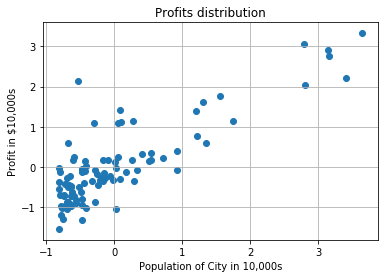

In [2]:
data = np.loadtxt('../../data/linear-regression/ex1data1.txt', delimiter=',')
X = data[:, 0].reshape(data[:, 0].shape[0], 1) # Population
Y = data[:, 1].reshape(data[:, 1].shape[0], 1) # profit

# Standardization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)

scatter(X, Y)
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
grid()

### Momentum Update

물리학적인 관점에서 optimization problem을 바라봤을때, convergence rate를 향상시킬수 있는 방법이 있습니다. <br>
Loss를 산등성이에서 height로 바라봤을때 물리학적으로 potential energy를 갖을수 있게 됩니다.) (TODO:추가 연구 필요) 

negative gradient는 양옆 가파른 산골짜기의 한쪽을 타고 조금씩 내려오는 형태와 유사하기 때문에 SGD는 convergence까지 매우 느립니다. (특히 초기 steep gain이후에 계속해서 더 느려짐) 



$$ \begin{align}
v &= \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta; x^{(i)},y^{(i)}) \\
\theta &= \theta - v
\end{align} $$

위의 SGD예제처럼 gradient값이 집접적으로 weights에 영향을 주는것이 아니라, gradient값은 오직 velocity에 영향을 주게 됩니다. <br>
그 뒤 velocity는 weights값에 영향을 미치게 됩니다.

**코드에서 구현은 안되어 있지만 일반적으로 momentum은 0.5에서 시작해서 끝날때쯤에는 0.99까지 가게 만드는게 일반적입니다**

[ 1.23332845] [ 2.14398492] [ 0.91065648]
[-0.62766967] [ 0.60036371] [ 1.22803338]
[ 1.81215501] [ 1.4270652] [-0.38508981]
[ 0.66150822] [ 1.09724564] [ 0.43573741]
[-0.8760283] [ 0.17953366] [ 1.05556195]
[ 1.40816022] [ 1.10308315] [-0.30507707]
[-0.45814343] [-0.27196159] [ 0.18618184]
[ 1.53077] [ 1.12387929] [-0.4068907]
[-0.5845009] [ 0.1385616] [ 0.7230625]
[-1.86277121] [-0.36895554] [ 1.49381567]
[-1.60672709] [-0.4719147] [ 1.13481239]
[ 5.17020637] [ 1.76326954] [-3.40693684]
[-1.60078731] [-0.48962791] [ 1.1111594]
[ 0.56191854] [ 0.25295864] [-0.3089599]
[-2.08638488] [-0.93454136] [ 1.15184352]
[-1.70629085] [-0.4243572] [ 1.28193365]
[-0.85333405] [-0.09747464] [ 0.75585941]
[-2.35917503] [-0.96289161] [ 1.39628342]
[-1.10566574] [-0.39901874] [ 0.706647]
[-0.44718883] [-0.08205996] [ 0.36512888]
[-1.31209087] [-0.49263788] [ 0.81945299]
[ 9.40956768] [ 2.90559812] [-6.50396956]
[-1.43826199] [-0.28752222] [ 1.15073977]
[-0.83845464] [-0.11887278] [ 0.71958186]
[-1.588

[-0.35745352] [-0.34235837] [ 0.01509515]
[-0.09698419] [-0.07753588] [ 0.01944831]
[-0.11511361] [-0.12217462] [-0.00706102]
[-1.04463493] [-1.20069006] [-0.15605513]
[ 1.70370581] [ 2.20546125] [ 0.50175544]
[ 0.86909943] [ 1.1337301] [ 0.26463067]
[ 1.57159527] [ 2.04584171] [ 0.47424644]
[-0.09898126] [-0.17401905] [-0.07503779]
[ 0.00094926] [-0.01731827] [-0.01826753]
[ 0.26700254] [ 0.35321795] [ 0.08621541]
[-0.71344392] [-0.87961035] [-0.16616643]
[ 2.1271984] [ 2.76422082] [ 0.63702242]
[ 0.0586566] [ 0.15337429] [ 0.0947177]
[-0.26307415] [-0.33077455] [-0.0677004]
[-0.68278873] [-0.83197988] [-0.14919115]
[-0.37921116] [-0.45569736] [-0.0764862]
[-1.33918343] [-1.5542081] [-0.21502467]
[-0.88593961] [-1.01104928] [-0.12510968]
[-0.2899544] [-0.35656907] [-0.06661467]
[ 0.20396267] [-0.02512595] [-0.22908862]
[ 0.06162278] [ 0.1666364] [ 0.10501362]
[-0.46389353] [-0.68983641] [-0.22594288]
[-0.78993679] [-0.9777116] [-0.18777481]
[-0.80211376] [-1.02793612] [-0.22582236]
[-

[-0.44810044] [-0.96289161] [-0.51479117]
[-0.10645736] [-0.39901874] [-0.29256139]
[ 0.10091907] [-0.08205996] [-0.18297903]
[-0.15767177] [-0.49263788] [-0.33496611]
[ 0.81516775] [ 2.90559812] [ 2.09043037]
[ 0.17063118] [-0.28752222] [-0.4581534]
[ 0.19415041] [-0.11887278] [-0.31302319]
[-0.05739776] [-0.50287177] [-0.44547401]
[ 1.17176822] [ 3.06448797] [ 1.89271974]
[ 0.56278769] [ 1.3976952] [ 0.83490751]
[-0.2902663] [ 0.2202868] [ 0.51055311]
[ 0.70642042] [ 1.61496019] [ 0.90853976]
[ 0.80836841] [ 3.33976325] [ 2.53139484]
[-0.77911609] [-1.28774381] [-0.50862773]
[ 0.29755951] [ 0.02872512] [-0.26883439]
[ 0.93107742] [ 1.14832389] [ 0.21724646]
[-0.33200566] [-0.72779849] [-0.39579283]
[ 0.09829506] [ 0.12832771] [ 0.03003265]
[-0.21228912] [-0.23292322] [-0.02063409]
[-0.32327129] [-0.31426533] [ 0.00900596]
[ 0.00370875] [-0.44626612] [-0.44997488]
[-0.09993428] [ 0.78037806] [ 0.88031234]
[ 0.25086309] [-0.0623401] [-0.31320319]
[-0.47685479] [-0.96365779] [-0.486803]

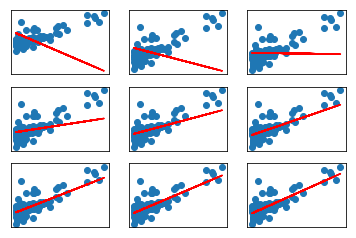

In [5]:
w = np.array([-0.1941133,  -2.07505268])

def predict(w, X):
    N = len(X)
    yhat = w[1:].dot(X.T) + w[0]
    yhat = yhat.reshape(X.shape)
    return yhat

def momentum_nn(X, Y, w, eta=0.1, gamma=0.5):
    N = len(X)
    v = np.zeros(w.shape[1:])
    v_b = np.zeros(1)
    
    for i in range(N):
        x = X[i]
        y = Y[i]
        yhat = predict(w, x)
        delta = y - yhat
        
        v = gamma*v + 2/N * eta * np.sum(-delta.dot(x))
        v_b = gamma*v_b + 2/N * eta * np.sum(-delta)
        
        w[1:] = w[1:] - v
        w[0] = w[0] - v_b
    return w
    

for i in range(1, 10):
    w = momentum_nn(X, Y, w)
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')